# LSTM_Keras

In [0]:
!pip install tensorflow-gpu===2.1.0

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 3.9MB 52.4MB/s 
     |████████████████████████████████| 450kB 40.5MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split




In [0]:
df = pd.read_csv('http://linkededucation.com.br/temp/google_stock_price.csv')
df.head()

,Stock_Price
0,50.12
1,54.10
2,54.65
3,52.38
4,52.95


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 1 columns):
Stock_Price    3012 non-null float64
dtypes: float64(1)
memory usage: 23.7 KB


In [0]:
df['Stock_Price'].describe()

count    3012.000000
mean      334.310093
std       173.187205
min        49.950000
25%       218.045000
50%       283.315000
75%       443.000000
max       782.220000
Name: Stock_Price, dtype: float64

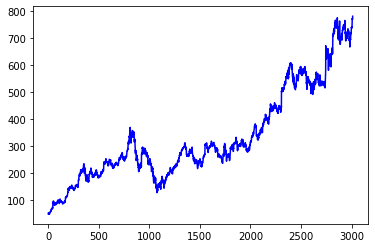

In [0]:
#Gráfico do ativo
plt.plot(df,color='blue')
plt.show()

In [0]:
#Criação das janelas de 8 dias no dataframe..inicializadas com zero
df['d1']=0.0
df['d2']=0.0
df['d3']=0.0
df['d4']=0.0
df['d5']=0.0
df['d6']=0.0
df['d7']=0.0
df['target']=0.0

df.head()

,Stock_Price,d1,d2,d3,d4,d5,d6,d7,target
0,50.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,54.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#populando as janelas temporais
for i in range(2900):
  df.iloc[i,1]=df.iloc[i+1,0]
  df.iloc[i,2]=df.iloc[i+2,0]
  df.iloc[i,3]=df.iloc[i+3,0]
  df.iloc[i,4]=df.iloc[i+4,0]
  df.iloc[i,5]=df.iloc[i+5,0]
  df.iloc[i,6]=df.iloc[i+6,0]
  df.iloc[i,7]=df.iloc[i+7,0]
  df.iloc[i,8]=df.iloc[i+8,0]

ndf=df[:2800].copy()
y=np.array(ndf['target'])
ndf=ndf.drop(columns='target',axis=1)
ndf.rename(columns={"Stock_Price": "d0"},inplace=True)
ndf.head()

,d0,d1,d2,d3,d4,d5,d6,d7
0,50.12,54.10,54.65,52.38,52.95,53.90,53.02,50.95
1,54.10,54.65,52.38,52.95,53.90,53.02,50.95,51.13
2,54.65,52.38,52.95,53.90,53.02,50.95,51.13,50.07
3,52.38,52.95,53.90,53.02,50.95,51.13,50.07,50.70
4,52.95,53.90,53.02,50.95,51.13,50.07,50.70,49.95


In [0]:
X=np.array(ndf)
print(X.shape)
print(X[:3])
print(X.shape)
X=X[:,:,np.newaxis]
print(X.shape)
X[:3],y[:3]

(2800, 8)
[[50.12 54.1  54.65 52.38 52.95 53.9  53.02 50.95]
 [54.1  54.65 52.38 52.95 53.9  53.02 50.95 51.13]
 [54.65 52.38 52.95 53.9  53.02 50.95 51.13 50.07]]
(2800, 8)
(2800, 8, 1)


(array([[[50.12],
         [54.1 ],
         [54.65],
         [52.38],
         [52.95],
         [53.9 ],
         [53.02],
         [50.95]],
 
        [[54.1 ],
         [54.65],
         [52.38],
         [52.95],
         [53.9 ],
         [53.02],
         [50.95],
         [51.13]],
 
        [[54.65],
         [52.38],
         [52.95],
         [53.9 ],
         [53.02],
         [50.95],
         [51.13],
         [50.07]]]), array([51.13, 50.07, 50.7 ]))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100,input_shape=(None,1)))
model.add(tf.keras.layers.Dense(1,activation=lambda x:x))

In [0]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',loss='mse')

In [0]:
model.layers[2].get_config()

{'activation': '<lambda>',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_1',
 'trainable': True,
 'units': 1,
 'use_bias': True}

In [0]:
model.fit(X_train, y_train, epochs=500, verbose=1)

Train on 1960 samples
Epoch 1/500
1960/1960 [==============================] - 7s 3ms/sample - loss: 113580.5494
Epoch 2/500
1960/1960 [==============================] - 0s 109us/sample - loss: 108074.7551
Epoch 3/500
1960/1960 [==============================] - 0s 110us/sample - loss: 103067.6883
Epoch 4/500
1960/1960 [==============================] - 0s 111us/sample - loss: 98342.1393
Epoch 5/500
1960/1960 [==============================] - 0s 113us/sample - loss: 94270.0508
Epoch 6/500
1960/1960 [==============================] - 0s 109us/sample - loss: 90926.1981
Epoch 7/500
1960/1960 [==============================] - 0s 113us/sample - loss: 87767.2221
Epoch 8/500
1960/1960 [==============================] - 0s 105us/sample - loss: 84790.0991
Epoch 9/500
1960/1960 [==============================] - 0s 106us/sample - loss: 81964.8844
Epoch 10/500
1960/1960 [==============================] - 0s 112us/sample - loss: 79292.8402
Epoch 11/500
1960/1960 [==============================] 

In [0]:
model.evaluate(X_test,y_test)

840/840 [==============================] - 0s 368us/sample - loss: 34.8076


34.807591792515346

In [0]:
model.predict(np.array([[[50.12],[54.10],[54.65],[52.38]]]))

array([[38.7423]], dtype=float32)

In [0]:
#crie um modelo MLP para comparar
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(500,activation='relu',input_shape=(1,8)))
model1.add(tf.keras.layers.Dense(1,activation=lambda x:x))

In [0]:
model1.compile(optimizer='adam',loss='mse')

In [0]:
model.layers[1].get_config()

In [0]:
X_train2=X_train.reshape((1960,1,8))
X_train2.shape

(1960, 1, 8)

In [0]:
# fit model

model1.fit(X_train2, y_train,epochs=500, verbose=1)

Train on 1960 samples
Epoch 1/500
1960/1960 [==============================] - 0s 227us/sample - loss: 23958.3781
Epoch 2/500
1960/1960 [==============================] - 0s 90us/sample - loss: 148.8361
Epoch 3/500
1960/1960 [==============================] - 0s 90us/sample - loss: 129.4965
Epoch 4/500
1960/1960 [==============================] - 0s 96us/sample - loss: 127.1132
Epoch 5/500
1960/1960 [==============================] - 0s 81us/sample - loss: 126.6977
Epoch 6/500
1960/1960 [==============================] - 0s 92us/sample - loss: 126.0147
Epoch 7/500
1960/1960 [==============================] - 0s 89us/sample - loss: 129.6767
Epoch 8/500
1960/1960 [==============================] - 0s 79us/sample - loss: 121.9132
Epoch 9/500
1960/1960 [==============================] - 0s 81us/sample - loss: 120.0194
Epoch 10/500
1960/1960 [==============================] - 0s 86us/sample - loss: 117.9078
Epoch 11/500
1960/1960 [==============================] - 0s 91us/sample - loss: 117

In [0]:
X_test2=X_test.reshape((840,1,8))
model1.evaluate(X_test2,y_test)

840/840 [==============================] - 0s 177us/sample - loss: 31.4170


31.416958599998836

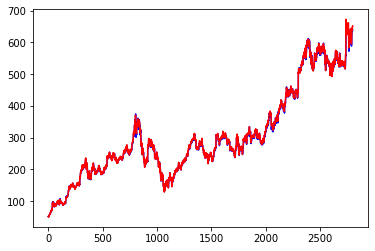

In [0]:
ye=model.predict(X)
import matplotlib.pyplot as plt
plt.plot(ye,color='blue')
plt.plot(y,color='red')
plt.show()

In [0]:

X1=X.reshape((2800,1,8))
X1[:3]

array([[[50.12, 54.1 , 54.65, 52.38, 52.95, 53.9 , 53.02, 50.95]],

       [[54.1 , 54.65, 52.38, 52.95, 53.9 , 53.02, 50.95, 51.13]],

       [[54.65, 52.38, 52.95, 53.9 , 53.02, 50.95, 51.13, 50.07]]])

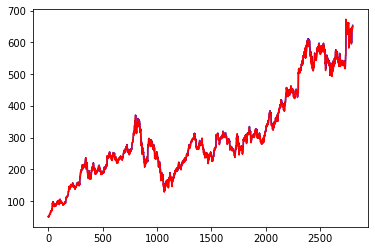

In [0]:
ye1=model1.predict(X1).reshape((2800,))
plt.plot(ye1,color='blue')
plt.plot(y,color='red')
plt.show()



In [0]:
ye1

array([[[ 51.737476]],

       [[ 51.792435]],

       [[ 50.77785 ]],

       ...,

       [[646.83093 ]],

       [[650.2632  ]],

       [[656.0168  ]]], dtype=float32)

Avaliação do custo com treinamento em séries de 8 dias e predição em séries de 3 a 20 dias

500/500 [==============================] - 0s 526us/sample - loss: 13.8100


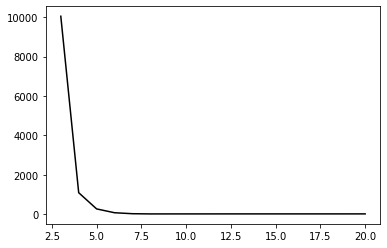

In [0]:
df2 = pd.read_csv('http://linkededucation.com.br/temp/google_stock_price.csv')
df2.rename(columns={"Stock_Price": "d0"},inplace=True)
loss=[]
for tam in range(3,21):
  dfg=df2[:520].copy()
  for kk in range(1,tam):
    dfg['d'+str(kk)]=0.0
  dfg['target']=0.0
  for i in range(500):
    for j in range(1,tam+1):
      dfg.iloc[i,j]=dfg.iloc[i+j,0]

  yt=np.array(dfg['target'])[:500]
  dfg=dfg.drop(columns='target',axis=1)
  Xt=np.array(dfg)[:500]
  Xt=Xt[:,:,np.newaxis]
  loss.append(model.evaluate(Xt,yt))

plt.plot([i for i in range(3,21)],loss,color='black')
plt.show()